### Download a single surface parameter at a single forecast step for all ensemble members from ECMWF's 12UTC 00UTC AIFS-ENS forecast

In this notebook we will download a surface paramter for a single step from the AIFS-ENS using earthkit and plot the data

In [1]:
import earthkit.data
import earthkit.plots

Using `earthkit-data` we request the `"ecmwf-open-data"` source to use the `ecmwf-opendata` client. We then request `source` `ecmwf-testdata`, this should be set in your `.ecmwf-opendata` file in your hope directory as below.

In [ ]:
{
        "ecmwf-testdata" : "https://data.ecmwf.int/forecasts/aifs-ens_testdata/"
}

This retrieves test-data, once the `aifs-ens` is operational the `source=ecmwf` will contain the data.

We then request the `aifs-ens` model for the control forecast.

In [2]:
ds = earthkit.data.from_source(
    "ecmwf-open-data", 
    source="ecmwf-testdata", 
    model="aifs-ens",    
    time=0,
    stream="enfo",
    type="cf",
    param=["msl", "2t"],
    target="data.grib2",
)

20250625000000-0h-enfo-cf.grib2:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

We retrieve two parameters as listed here.

In [3]:
ds.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,msl,meanSea,0,20250625,0,0,cf,0,regular_ll
1,ecmf,2t,heightAboveGround,2,20250625,0,0,cf,0,regular_ll


We can then plot the 2 metre temperature using earthkit-plots.

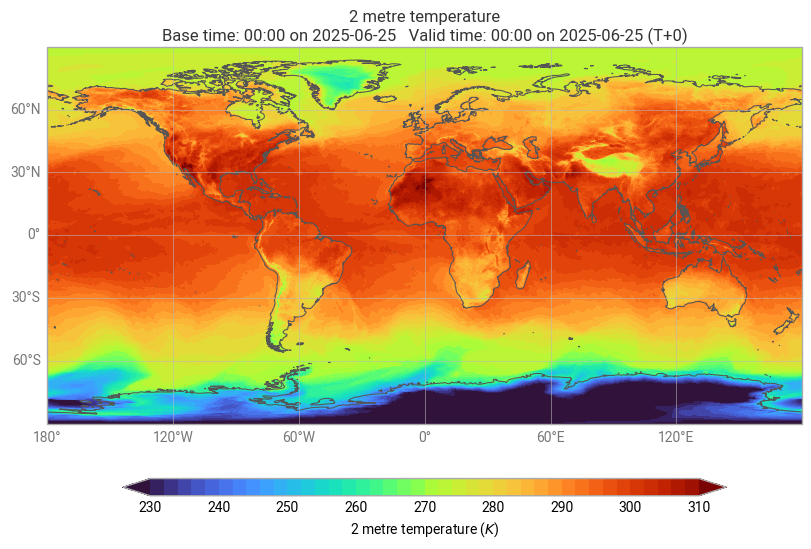

In [4]:
earthkit.plots.quickplot(ds[1])